In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

train=pd.read_csv('train.csv')


## Step 1 
Read the file train.csv into Python and print a few rows.

In [3]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2
Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [5]:
## Calculate survivors/non-survivors
train['Survived'].value_counts()

df.

0    549
1    342
Name: Survived, dtype: int64

([<matplotlib.axis.XTick at 0x214abc8a0d0>,
 [Text(0, 0, 'non-survivors'), Text(1, 0, 'survivors')])

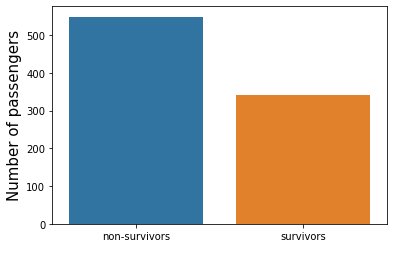

In [4]:
## Plot survivors/non-survivors on bar plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

p=sns.barplot(x ='Survived', y = train['Survived'].value_counts(), data = train)
p.set_xlabel("  ", fontsize = 20)
p.set_ylabel("Number of passengers", fontsize = 15)
plt.xticks([0,1],['non-survivors','survivors'])

## EDA

C:\Users\elenm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

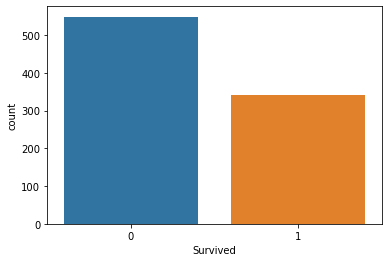

In [9]:
sns.countplot(train['Survived'])

In [23]:
## EDA for survivors in the different column

train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:>

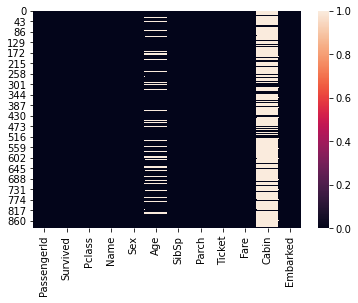

In [28]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

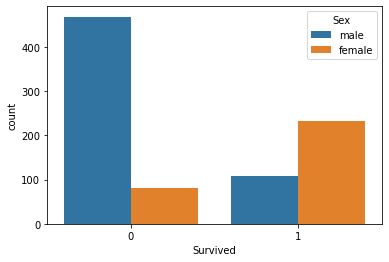

In [30]:
# survivors per sex
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

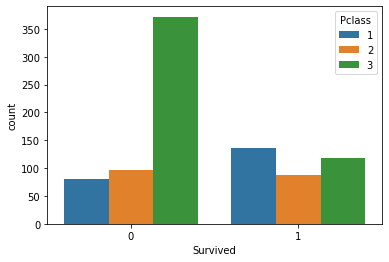

In [31]:
# survivors per Pclass
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot:xlabel='Age'>

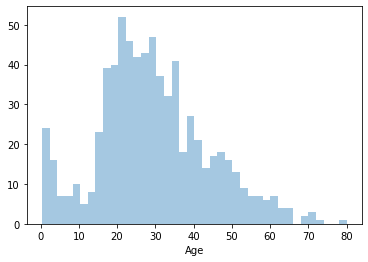

In [35]:
# Age distrivution of passengers
sns.distplot(train['Age'].dropna(), kde=False, bins=40)

## Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [5]:
## surviving 1st class passengers
first_class=train[train['Pclass']==1]
first_class.count('Survived'==0)


PassengerId    216
Survived       216
Pclass         216
Name           216
Sex            216
Age            186
SibSp          216
Parch          216
Ticket         216
Fare           216
Cabin          176
Embarked       214
dtype: int64

In [6]:
train['Noise']=np.random.normal(size=train.shape[0])
train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noise
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.499696
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.296650


<AxesSubplot:>

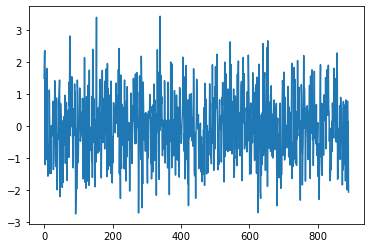

In [7]:
train['Noise'].plot()

In [6]:
train.shape

(891, 12)

In [7]:
train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


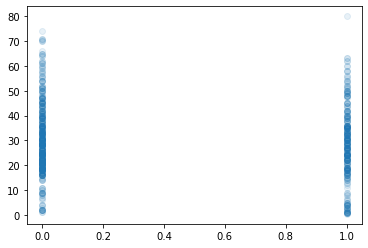

In [8]:
plt.scatter(train.Survived, train.Age, alpha=0.1)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

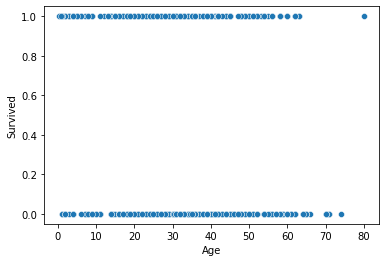

In [10]:
sns.scatterplot(data=train, x= 'Age', y= 'Survived')

In [94]:
X=train[['Pclass']]
y=train['Survived']
X.shape, y_train.shape


((891, 1), (712,))

In [101]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.4)

In [102]:
m= LogisticRegression()

In [103]:
m.fit(X_train,y_train) 

LogisticRegression()

In [104]:
predictions=m.predict(X_test)

In [105]:
accuracy_score(y_test,predictions)

0.6750700280112045

In [100]:
m.score(X,y) 

0.6790123456790124

In [ ]:
#m = LogisticRegression()
#m.fit(x_train,y_train)